## Model Selection & Assessment 

August 16th, 2016

Jiehua Chen

QED | http://qed.ai



### Model selection:

estimate performance of different models to select best one




### Model assessment: 

having chosen a final model, estimate expected prediction error on unobserved data


![workflow Image](img\dataresearch_workflow3.png)

### Expected Prediction Error
$$E_{ROI}(L(  Y, \hat{f}(X))\mid T)$$

* Given a model built with the observed dataset, what is the average prediction error in the ROI?
#### Loss Function 
* $R^2$
* $(Y - \hat{f}(X))^2$
* $|Y-\hat{f}(X)|$
* A typical split might be 50% for training, and 25% each for validation and testing:

![test error Image](img\testerror.png)

* Estimate all 3 models on Training dataset

$$\mbox{yield} = \beta_{0,1} + \beta_{1,1} \mbox{rain} + \epsilon$$
$$\mbox{yield} = \beta_{0,2} + \beta_{1,2} \mbox{year} + \epsilon$$
$$\mbox{yield} = \beta_{0,3} + \beta_{1,3} \mbox{rain} +  \beta_{2,1} \mbox{year} + \epsilon$$


* Predict all 3 models on Validation dataset to get 

$$\hat{\mbox{yield}}_{1, \mbox{val}} = \beta_{0,1} + \beta_{1,1} \mbox{rain}$$
$$\hat{\mbox{yield}}_{2, \mbox{val}} = \beta_{0,2} + \beta_{1,2} \mbox{year}$$
$$\hat{\mbox{yield}}_{3, \mbox{val}} = \beta_{0,3} + \beta_{1,3} \mbox{rain} +  \beta_{2,3} \mbox{year} $$


* If model 2 gives the smallest validation error, then we select model 2, and cite the prediction error of on the test set on model 2

$$\hat{\mbox{yield}}_{2, \mbox{test}} = \beta_{0,2} + \beta_{1,2} \mbox{year}$$

In [211]:
require("raster")

ss <- brick('lectures/climate/tza_annual_precipitation.grd')
rain <- cellStats(ss, mean)

# These are are yield data
year <- 1981:2013
yield <- c(1.9, 2.1, 2.3, 2.1, 2, 2.4, 2.1, 1.9, 2.3, 2.3, 2.5, 2.3, 2.5, 1.9, 2.4, 2.1, 2, 2.4, 1.8, 1.9, 2.2, 2.4, 2.5, 2.3, 2.7, 2.5, 2.7, 2.7, 2.6, 2.4, 2.4, 2.5, 2.4)

yield_data <- data.frame(cbind(yield, year, rain))

In [212]:
# shuffle the dataset
n <- nrow(yield_data)
SPoints<- c(1:n)
SPoints<- sample(SPoints)

yield_data <- yield_data[SPoints,]

n_train  <- round(n*0.5)
n_val <- round(n*0.25)
n_test <- n - n_train - n_val

# split the dataset
data_train <- yield_data[1:n_train,]
data_val <- yield_data[(n_train+1):(n_train+n_val), ]
data_test <- yield_data[(n_train+n_val+1):n, ]
    
yield_val <- data_val[, 1]
yield_test <- data_test[, 1]

In [213]:
n_val

[1] 8

In [214]:
valid_error <- rep(0, 3)

# yield = f( rain )
m1 <- lm(yield~rain, data=data_train)
predict_val_m1 <- predict(m1, data_val)
valid_error[1] <- mean((predict_val_m1-yield_val)^2)
    
# yield = f( time)
m2 <- lm(yield~year, data=data_train)
predict_val_m2<- predict(m2, data_val)
valid_error[2] <- mean((predict_val_m2-yield_val)^2)

# yield = f( time, rain)
m3 <- lm(yield~year+rain, data=data_train)
predict_val_m3<- predict(m3, data_val)
valid_error[3] <- mean((predict_val_m3-yield_val)^2)

In [215]:
valid_error

[1] 0.04503842 0.05051758 0.03784809

In [216]:
m3 <- lm(yield~year, data=rbind(data_train, data_val))
test_error <- mean((predict(m3, data_test) - yield_test)^2)
test_error

[1] 0.04696074

In [217]:
lm_final <- lm(yield~year+rain, data=yield_data)
summary(lm_final)


Call:
lm(formula = yield ~ year + rain, data = yield_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34450 -0.12686  0.00479  0.13416  0.29822 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.128e+01  6.421e+00  -4.871 3.35e-05 ***
year         1.622e-02  3.194e-03   5.079 1.86e-05 ***
rain         1.227e-03  2.825e-04   4.343 0.000148 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.173 on 30 degrees of freedom
Multiple R-squared:  0.5672,	Adjusted R-squared:  0.5383 
F-statistic: 19.66 on 2 and 30 DF,  p-value: 3.504e-06


### Disadvantages

* Require big data set

### Possible alternatives?
* Training Error
* Cross Validation

### Training Error 

$$\bar{err} = \frac{1}{N} \sum_{i=1}^{N} L(Y_i, \hat{f}(X_i))$$



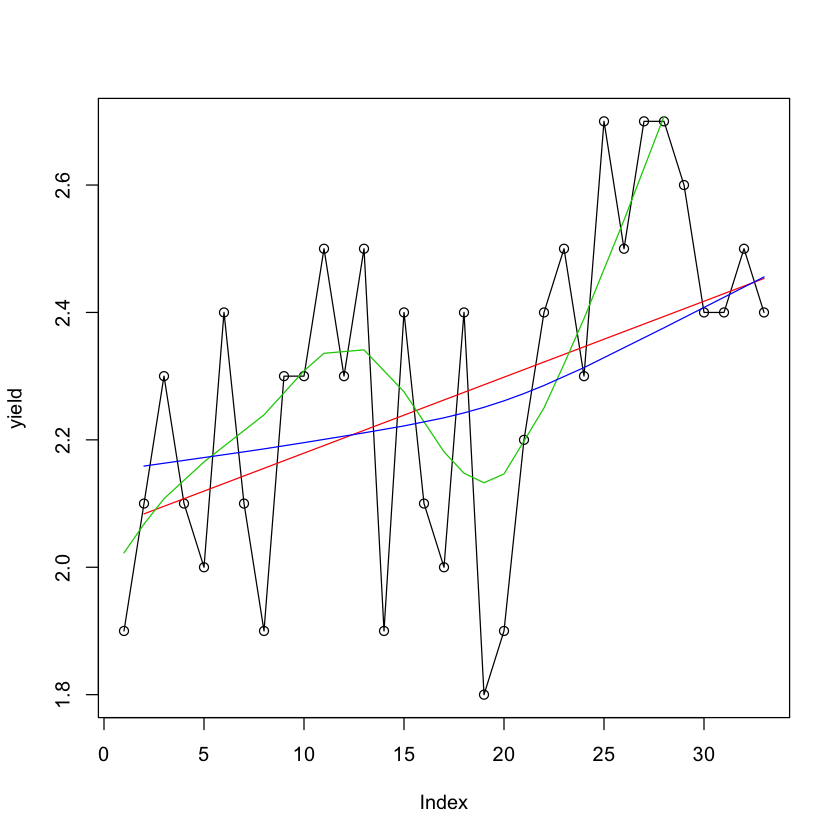

In [209]:
plot(yield)
lines(smooth.spline(yield, penalty=0))
random_index <- sample(1:length(yield), 20)
lines(smooth.spline(random_index, yield[random_index], cv=TRUE), col=2)

random_index <- sample(1:length(yield), 20)
lines(smooth.spline(random_index, yield[random_index], cv=TRUE), col=3)

random_index <- sample(1:length(yield), 20)
lines(smooth.spline(random_index, yield[random_index], cv=TRUE), col=4)

#lines(smooth.spline(yield[1:10]), col=2)


### K- fold Cross validation (Expect Test Error) $$E(L(  Y, \hat{f}(X))$$

   ![Cross Validation Image](img/B-fig-1.jpg)
   
   * CV_error = $$ \frac{1}{N}\sum_{i=1}^{N}L(Y_i, \hat{f}(X^{-k}_i))$$
   
   


* Training Error (blue)
* Cross Validation Error (red)
![Image of Yaktocat](img/errorplot.png)

### K-fold CV
#### How to pick K

   ![Cross Validation Image 2](img/cvfolds.png)
   

### Wrong way of  using CV


Typical strategy for analysis:

1. Find subset of “good” predictors showing strong correlation with response variable.
2. Using just this subset of predictors, build a model.
3. Use cross-validation to estimate both unknown tuning parameters and the prediction error of the final model.

### Right way of using CV
1. Divide samples into K cross-validation folds (groups) at random.
2. For each fold k = 1,2,...,K
    
    a. Find a subset of “good” predictors showing fairly strong correlation with class labels, using all the samples except those in fold k.
    
    b. Using just this subset of predictors, build a multivariate classifier using all of the samples except those in fold k.
    
    c. Use the classifier from b. to predict class labels for the samples in fold k.

  ![Cross Validation Image 3](img/cvcorrelation.png)

In [150]:
# Simple CV function
GetFolds<-function(data,Seed=1,NFolds=5)
{
    SPoints<-c(1:nrow(data))
        
    set.seed(Seed)
    SPoints<-sample(SPoints)
    nd<-floor(length(SPoints)/NFolds)
    folds <- rep(0, nrow(data))
    allindexes <- c(1:nrow(data))
    for (cv in 1:NFolds)
    {
        if (cv==NFolds)
            indexes<- ((cv-1)*nd+1):length(SPoints)
        else
            indexes<- ((cv-1)*nd+1):(cv*nd)
        testPoints=SPoints[(indexes)]      
        folds[allindexes[testPoints]] <- cv
    }
    return (folds)
}


In [218]:
cv_random  <- GetFolds(yield_data, Seed=1,NFolds=5)

In [219]:
cv_random

[1] 5 2 4 2 2 1 5 3 1 5 4 1 3 5 3 2 4 1 5 4 3 5 5 4 3 1 5 1 4 2 2 5 3

In [152]:
cv_error <- matrix(0, 3, length(unique(cv_random)))
for(i in 1:length(unique(cv_random))){
    data_train <- yield_data[cv_random!=i, ]
    data_test <- yield_data[cv_random==i, -1]
    yield_test <- yield_data[cv_random==i, 1]
    
    # yield = f( rain )
    m1 <- lm(yield~rain, data=data_train)
    predict_test_m1 <- predict(m1, data_test)
    cv_error[1,i] <- sum((predict_test_m1-yield_test)^2)
    # yield = f( time)
    m2 <- lm(yield~year, data=data_train)
    predict_test_m2 <- predict(m2, data_test)
    cv_error[2,i] <- sum((predict_test_m2-yield_test)^2)
    
    # yield = f( time, rain)
    m3 <- lm(yield~year+rain, data=data_train)
    predict_test_m3<- predict(m3, data_test)
    cv_error[3,i] <- sum((predict_test_m3-yield_test)^2)
}

In [220]:
rowSums(cv_error)/nrow(yield_data)

[1] 0.05995219 0.05080087 0.03560533

In [155]:
cv_error

[,1]      [,2]       [,3]      [,4]      [,5]
[1,] 0.3057949 0.6324956 0.28463968 0.3761660 0.3793261
[2,] 0.6132494 0.2608823 0.19274238 0.3297786 0.2797761
[3,] 0.2947594 0.3823430 0.07244487 0.1362394 0.2891892

### Cross-Validation in spatial context

* data points are dependent
* folds need to be selected to mimic the training data and ROI prediction regions
* need to use stratified CV or block CV

  ![Spatial Block Image](img/Canvas 1.png)

In [224]:
### split Column is the column used f
GetFolds_spatial<-function(data,splitColumn=NULL,Seed=1,NFolds=5, stratified=FALSE)
{
    if (!stratified){
        if (length(splitColumn)!=0)
        {
            SPoints<-unlist(unique(data[,splitColumn]))
        }
        else
        {
            SPoints<-c(1:nrow(data))
        }
        set.seed(Seed)
        SPoints<-sample(SPoints)
        nd<-floor(length(SPoints)/NFolds)
        folds <- rep(0, nrow(data))
        allindexes <- c(1:nrow(data))
        for (cv in 1:NFolds)
        {
            if (cv==NFolds)
                indexes<- ((cv-1)*nd+1):length(SPoints)
            else
                indexes<- ((cv-1)*nd+1):(cv*nd)
            testPoints=SPoints[(indexes)]
            if (length(splitColumn)!=0)
            {
                folds[allindexes[data[,splitColumn]%in%testPoints]] <- cv
            }
            else
            {
                folds[allindexes[testPoints]] <- cv
            }
        }
        folds 
    }
    else
    {
        if (length(splitColumn)==0){
            print("splitColumn is required for stratified CV")
            break
        }            
        folds<-dismo::kfold(data, k=NFolds, by=data[,splitColumn])
    }
    return (folds)
}

        

In [235]:
strata <- rep(1:11, 3)
yield_data <- data.frame(cbind(yield, year, rain, strata))

In [236]:
strata

[1]  1  2  3  4  5  6  7  8  9 10 11  1  2  3  4  5  6  7  8  9 10 11  1  2  3
[26]  4  5  6  7  8  9 10 11

In [61]:
strata[cv_random==1]

[1] 6 9 1 7 4 6

In [227]:
cv_block <- GetFolds_spatial(yield_data,splitColumn=4,Seed=1,NFolds=5, stratified=FALSE)

In [228]:
strata[cv_block==1]

[1] 3 4 3 4 3 4

In [229]:
strata[cv_block==2]

[1] 6 8 6 8 6 8

In [230]:
strata[cv_block==3]

[1] 2 9 2 9 2 9

In [232]:
cv_strata <- GetFolds_spatial(yield_data,splitColumn=4,Seed=1,NFolds=5, stratified=TRUE)

In [233]:
strata[cv_strata==1]

[1]  1  5  6  7  8  9 10 11  2  3  4

In [234]:
strata[cv_strata==2]

[1]  2  3  4  8 10  5  6  7  1  9 11